In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
# PLEASE DON'T CHANGE THIS
np.random.seed(0)


## Plan
- Linear Regression Model
- Logistic Regression Model
- K-Nearest Neighbors Model
- K-Means Clustering Model

## Linear Regression Model *(25 pts)*

In [189]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [190]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

assert diabetes_df.shape == (442, 11)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [191]:
data = diabetes.data # X values
target = diabetes.target # Y values

In [192]:
from sklearn.model_selection import train_test_split

# TODO: Split the data such that 80% is for training and 20% is for testing
# (5 pts)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [193]:
from sklearn.preprocessing import StandardScaler

# TODO: Fit and transform the training & test data with StandardScaler
# (5 pts)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
from sklearn.linear_model import LinearRegression

# TODO: Fit a linear regression model to the data
# (5 pts)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
None

In [195]:
# TODO: Predict the target for the testing data
# (5 pts)
y_pred = model.predict(X_test_scaled)

In [196]:
from sklearn.metrics import root_mean_squared_error

# TODO: Calculate the RMSE for the prediction using BOTH your own implementation and sklearn.metrics.mean_squared_error
# make sure that the results match (i.e. the difference is less than 1e-10 to account for floating point errors)
# (5 pts)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

own_rmse = rmse(y_test, y_pred)
sklearn_rmse = root_mean_squared_error(y_test, y_pred)

assert own_rmse == sklearn_rmse
own_rmse 

np.float64(58.51717127731562)

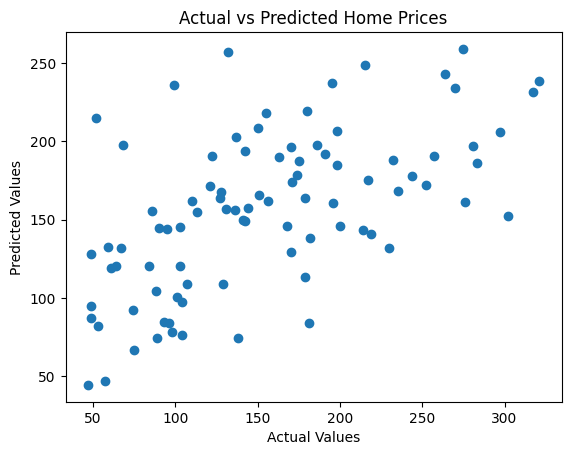

In [197]:
# TODO: Plot a scatter plot of the actual vs predicted values of the target
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Home Prices')
plt.show()

## Logistic Regression Classifier *(25 pts)*

In [198]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [199]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

assert iris_df.shape == (150, 5)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [200]:
data = iris.data # X values
target = iris.target # Y values

In [201]:
from sklearn.model_selection import train_test_split

# TODO: Split the data such that 80% is for training and 20% is for testing
# TODO: Fit and transform the training & test data with StandardScaler
# (4 pts)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [202]:
from sklearn.linear_model import LogisticRegression

# TODO: Fit a logistic regression model to the data
# (5 pts)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
None

In [203]:
# TODO: Predict the target for the testing data
# (1 pts)
y_pred = model.predict(X_test_scaled)

In [204]:
# TODO: Calculate the accuracy of the model
# HINT: use `accuracy_score`
# (5 pts)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [205]:
# TODO: Get the confusion matrix for the model
# HINT: check out `sklearn.metrics`
# (5 pts)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 7,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 13]])

In [206]:
# TODO: Explain what the confusion matrix is telling you about the model.
# (5 pts)

"""
Fill in your answer here.
"""

'\nFill in your answer here.\n'

## K-Nearest Neighbors Classifier *(25 pts)*

In [207]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [208]:
logits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
logits_df['target'] = digits.target

assert logits_df.shape == (1797, 65)
logits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [209]:
data = digits.data # X values
target = digits.target # Y values

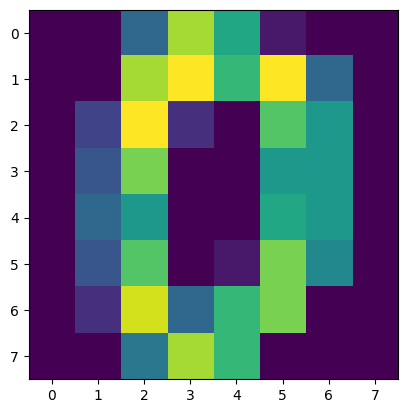

In [210]:
# TODO: write a function that takes in an index and plots the image at that index
# for ex: plot_image(0) should plot the image of the digit at index 0
# (5 pts)
# HINT: note that the images are 8x8, so you'll have to reshape the data to plot it (is there a np method for this?)
# HINT: use plt.imshow to plot the image
def plot_image(index, data):
    plt.imshow(data[index].reshape(8, 8))
    plt.show()

plot_image(0, data)

In [211]:
from sklearn.model_selection import train_test_split

# TODO: Split the data such that 80% is for training and 20% is for testing
# TODO: Fit and transform the training & test data with StandardScaler
# (6 pts)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [212]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: Fit a KNN model to the data
# (5 pts)

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
None

In [213]:
# TODO: Predict the target for the testing data
# (2 pts)

y_pred = model.predict(X_test_scaled)

In [214]:
# TODO: Calculate the accuracy of the model
# (2 pts)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9694444444444444

True Label: 2
Predicted Label: 1


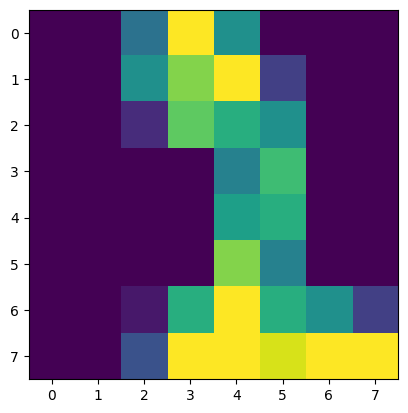

True Label: 9
Predicted Label: 8


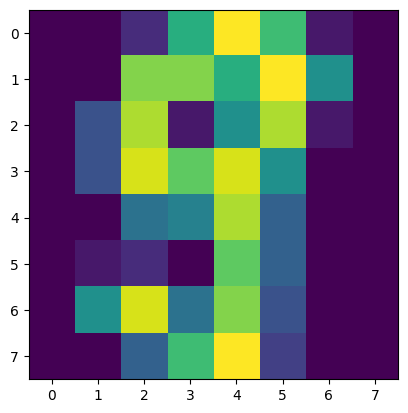

True Label: 3
Predicted Label: 7


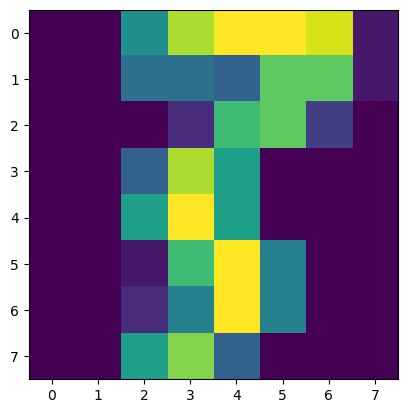

True Label: 8
Predicted Label: 1


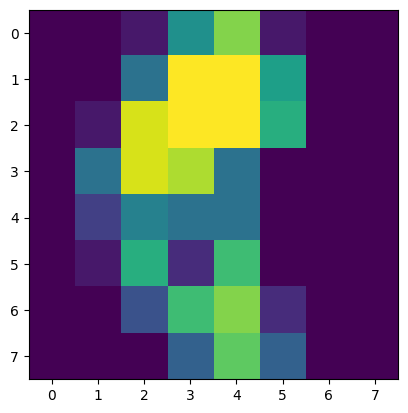

True Label: 3
Predicted Label: 8


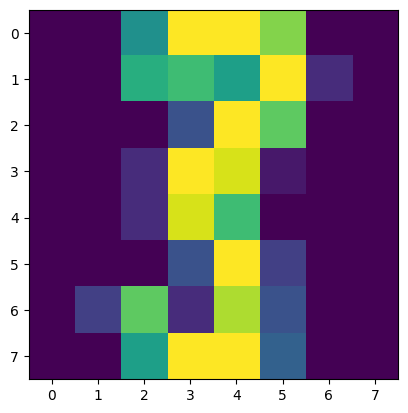

True Label: 7
Predicted Label: 9


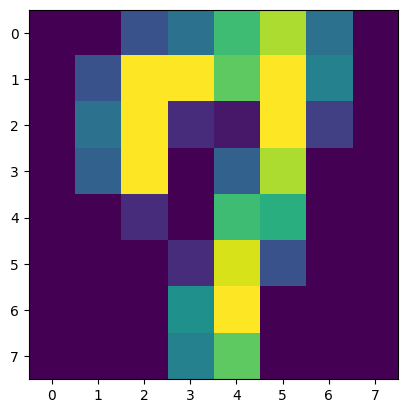

True Label: 8
Predicted Label: 1


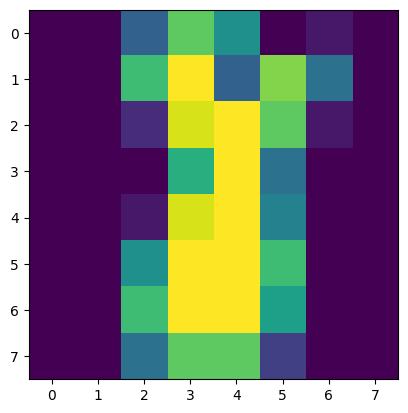

True Label: 8
Predicted Label: 1


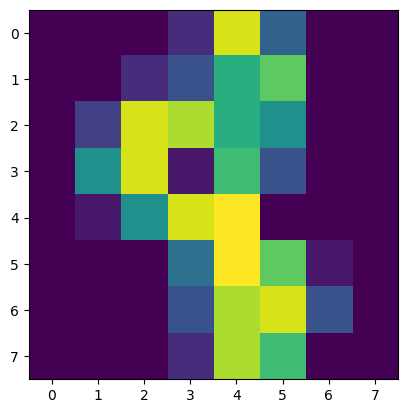

True Label: 3
Predicted Label: 7


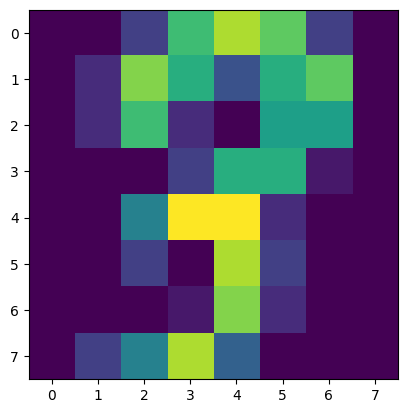

True Label: 8
Predicted Label: 1


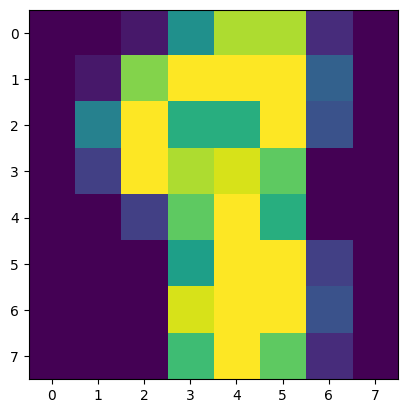

In [215]:
# TODO: Plot the first 10 images in the test set whose predicted labels do not match the true labels
# For each image, display the true label and the predicted label.
# (5 pts)

wrong_indices = np.where(y_test != y_pred)[0][:10]
for i in wrong_indices:
    print(f'True Label: {y_test[i]}')
    print(f'Predicted Label: {y_pred[i]}')
    plot_image(i, X_test)

## Unsupervised Learning *(25 pts)*

In [216]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [217]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

assert wine_df.shape == (178, 14)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [218]:
# NOTE: unlike the previous datasets, we will NOT be using the target column for this dataset
data = wine.data # X values

In [219]:
# TODO: Fit and transform the data with StandardScaler
# (2 pts)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [220]:
from sklearn.cluster import KMeans

# TODO: Fit a KMeans model to the data with clusters ranging from 1 to 10
# (you should have 10 models)
# (5 pts)

models = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    models.append(model)
    
len(models)

10

In [221]:
from sklearn.decomposition import PCA

# TODO: Use PCA to reduce the dimensionality of the wine data to 2 components
# (3 pts)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

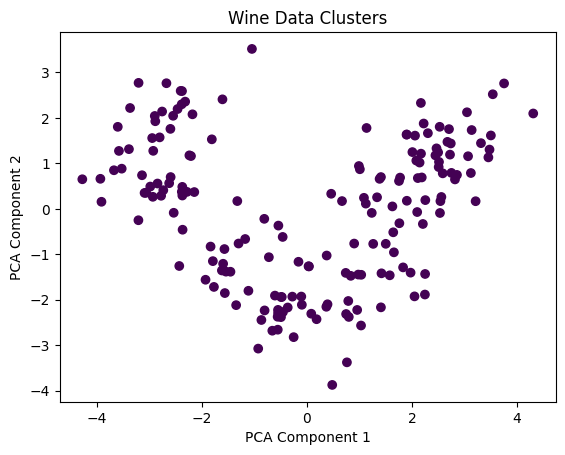

In [222]:
# TODO: Define a function to plot the wine data using the PCA components as x and y,
#       with the color representing the cluster assignment.
# HINT: models[i].labels_ will give you the cluster assignments for the ith model (should have i clusters)
# (5 pts)

def plot_clusters(labels):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Wine Data Clusters')
    plt.show()

# Example:
plot_clusters(models[0].labels_)

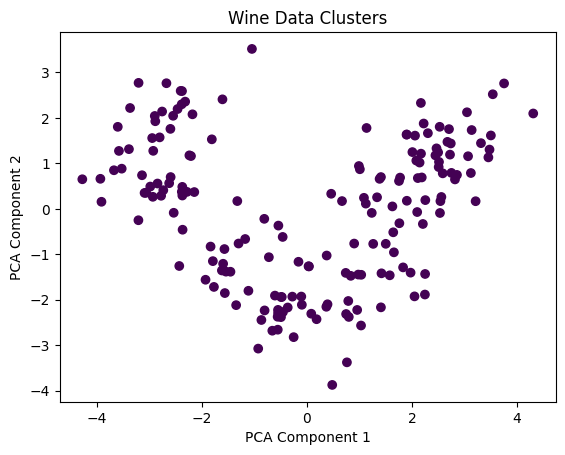

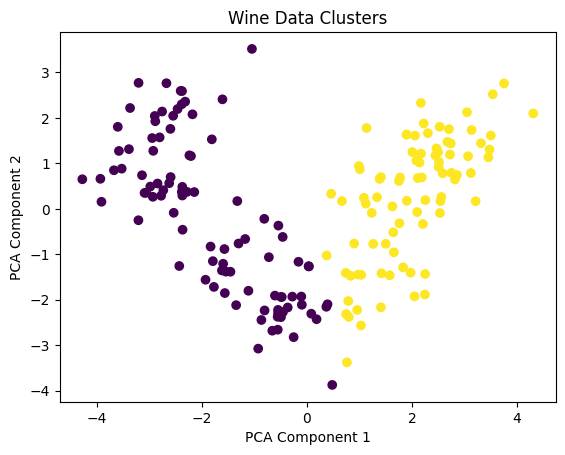

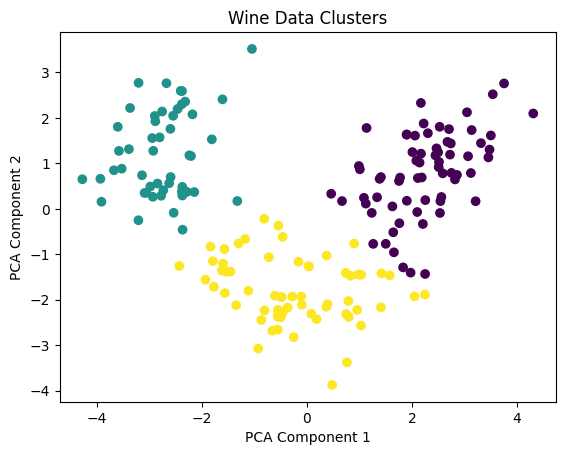

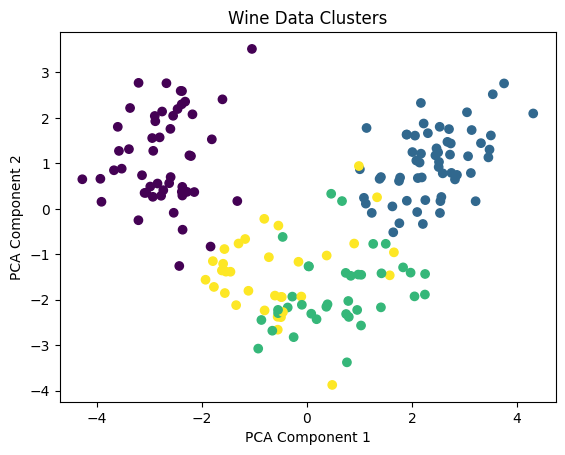

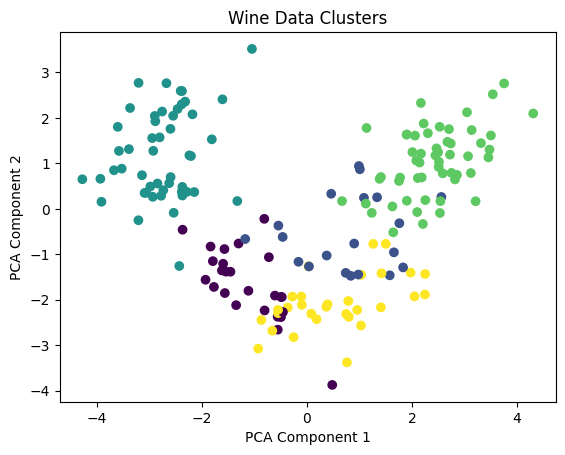

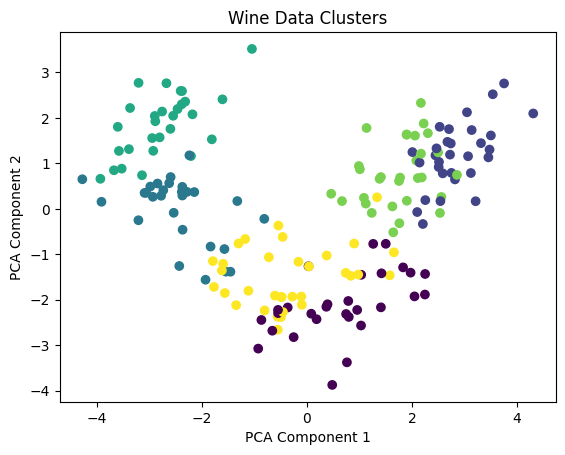

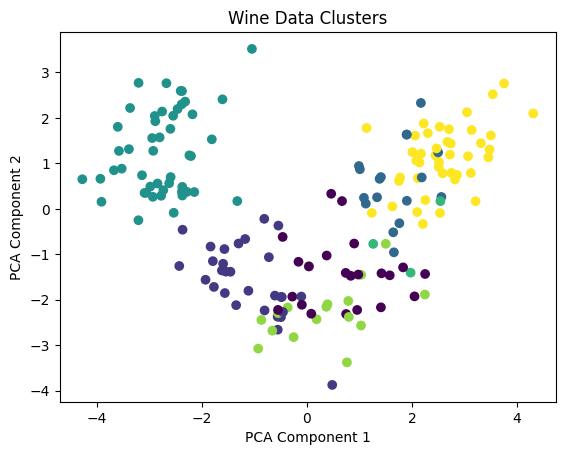

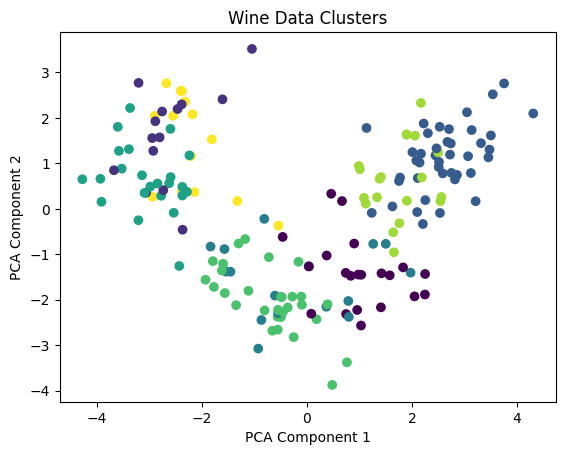

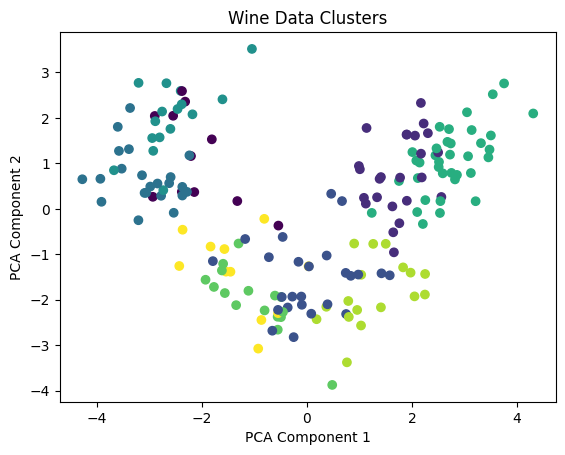

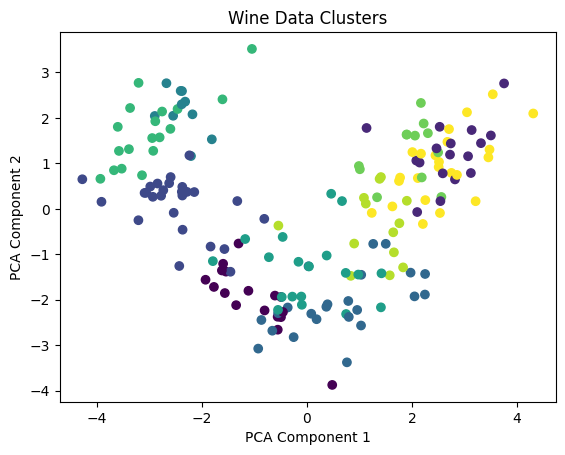

In [223]:
# TODO: Use the above function to plot the wine data for each of the 10 models
# (5 pts)

for model in models:
    plot_clusters(model.labels_)

In [224]:
# TODO: From the above plots, which number of clusters seems to be the best choice for the wine data? Explain why.
# (5 pts)

optimal_clusters = ...

"""
Fill in your explanation here.
"""

'\nFill in your explanation here.\n'